# Discover and Visualize the Data to Gain Insights

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request 

# 저장한 CSV 파일을 불러오기
strat_train_set = pd.read_csv('train_set.csv')
strat_test_set = pd.read_csv('test_set.csv')

In [34]:
housing = strat_train_set.copy()

In [39]:
import os
# 파일 경로 재지정(새로운 노트북이라...)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Visualizing Geographical Data

Saving figure bad_visualization_plot


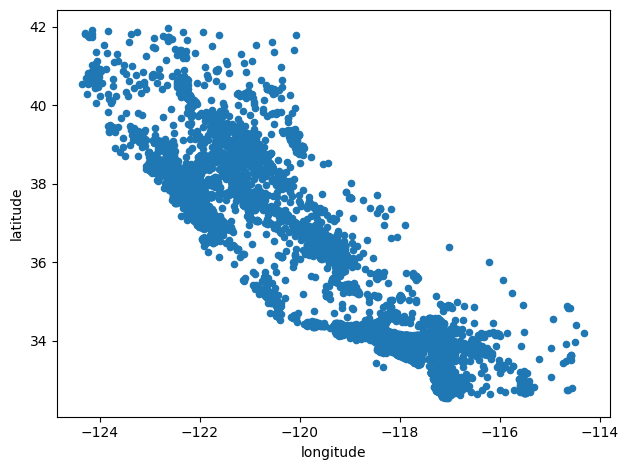

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude")
# housing 데이터프레임에서 경도(x축), 위도(y축)를 기준으로 산점도(scatter plot) 생성
# → 지리적으로 주택 데이터가 어떻게 분포되어 있는지 시각화
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


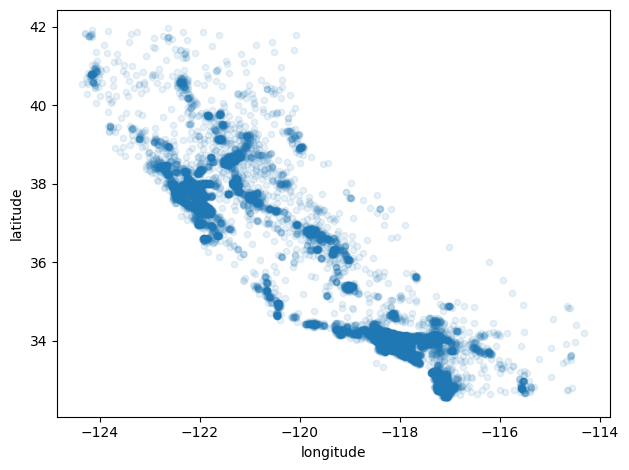

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# 주택 데이터(housing)의 지리적 위치를 산점도로 시각화
# x축: longitude (경도), y축: latitude (위도)
# kind="scatter" → 산점도 형태로 출력
# alpha=0.1 → 점의 투명도를 낮춰서 밀집도를 시각적으로 강조
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


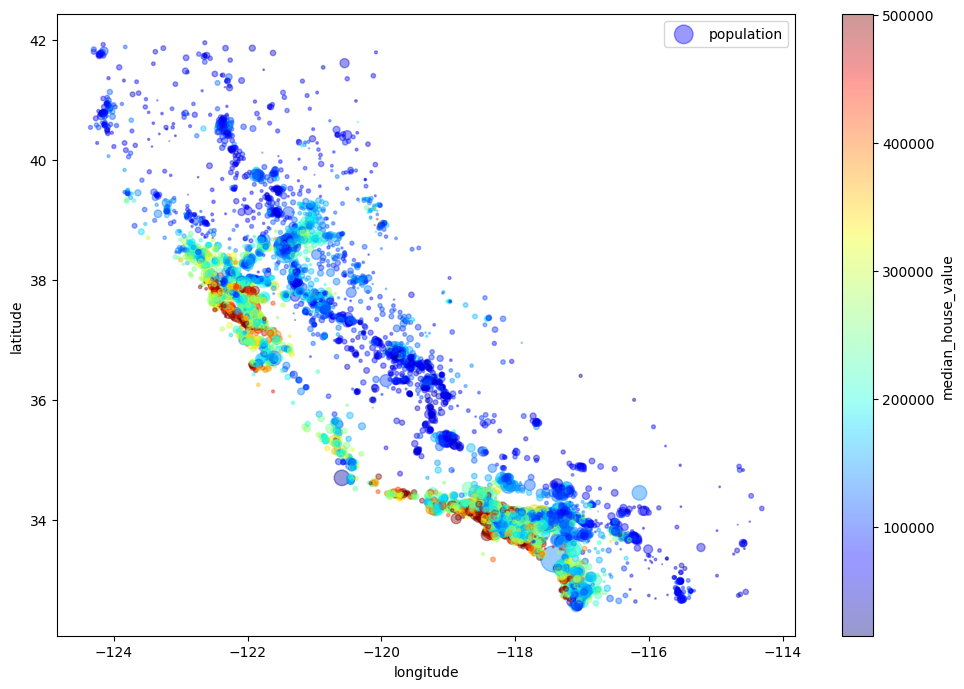

In [47]:
# 'longitude'와 'latitude'를 기준으로 산점도 생성
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,  # 점의 투명도 설정
             s=housing["population"]/100,  # 점 크기: 인구 수에 비례 (100으로 나누어 크기 조정)
             label="population",  # 범례에 표시될 라벨
             figsize=(10,7),  # 그래프 크기 설정
             c="median_house_value",  # 점의 색상: 중간 집값에 따라 색상 지정
             cmap=plt.get_cmap("jet"),  # 색상 맵 설정
             colorbar=True,  # 색상 바 표시
             sharex=False)  # x축 공유 여부 (False는 각 서브 플롯이 개별 x축을 가짐)

plt.legend()  # 범례 추가
save_fig("housing_prices_scatterplot")  # 그래프를 'housing_prices_scatterplot.png'로 저장

In [53]:
# 'images' 폴더와 'end_to_end_project' 폴더가 없으면 생성
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)

# 이미지 다운로드를 위한 기본 URL 설정
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"

# 다운로드 진행 중 메시지 출력
print("Downloading", filename)

# 이미지 URL 생성
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

# URL에서 이미지를 다운로드하여 지정된 경로에 저장
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x252cfc2bce0>)

Saving figure california_housing_prices_plot


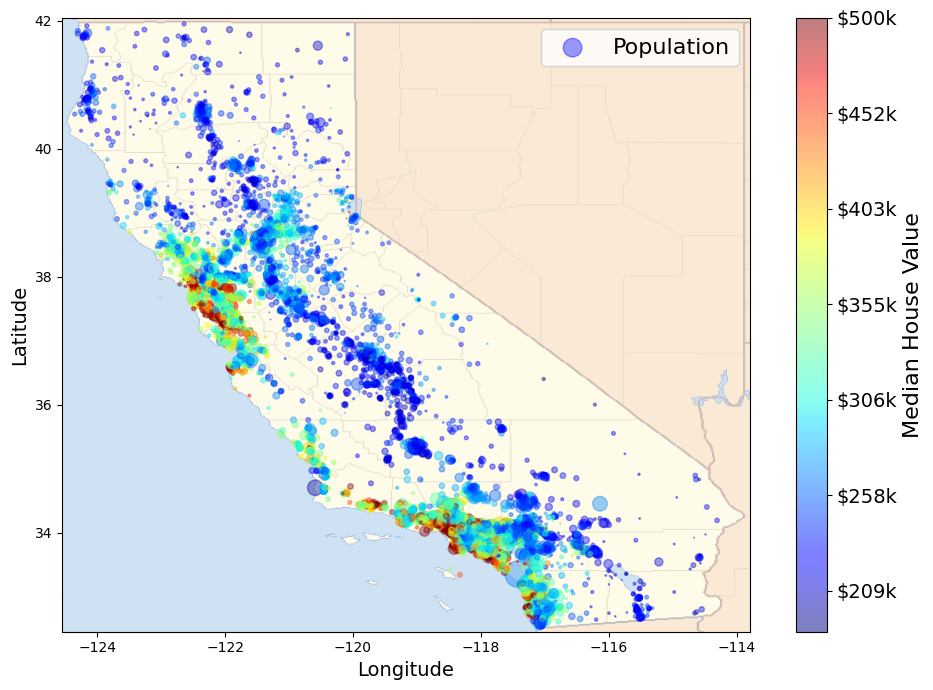

In [54]:
import matplotlib.image as mpimg  # 이미지를 불러오기 위한 라이브러리 임포트

# 'california.png' 이미지를 읽어오기
california_img = mpimg.imread(os.path.join(images_path, filename))

# 산점도 그래프 그리기
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),  # x, y 축에 longitude와 latitude 사용
                  s=housing['population']/100, label="Population",  # 점 크기: 인구수에 비례, 100으로 나누어 크기 조정
                  c="median_house_value", cmap=plt.get_cmap("jet"),  # 점 색상: 중간 집값에 따라 색상 지정
                  colorbar=False, alpha=0.4)  # 투명도 설정 (alpha=0.4), 색상 바는 표시하지 않음

# 캘리포니아 이미지를 배경에 표시
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,  # 이미지의 좌표 범위 설정 (extent)
           cmap=plt.get_cmap("jet"))  # 이미지에 'jet' 색상 맵 적용

# 축 라벨 설정
plt.ylabel("Latitude", fontsize=14)  # y축 라벨
plt.xlabel("Longitude", fontsize=14)  # x축 라벨

# 집값에 대한 색상 바 생성
prices = housing["median_house_value"]  # 중간 집값 데이터
tick_values = np.linspace(prices.min(), prices.max(), 11)  # 집값 범위에 맞춰 11개의 값 생성
cbar = plt.colorbar(ticks=tick_values/prices.max())  # 색상 바 생성, 집값 범위에 맞춰 ticks 설정
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)  # 색상 바에 레이블 추가 (단위: 천 달러)
cbar.set_label('Median House Value', fontsize=16)  # 색상 바에 레이블 'Median House Value' 추가

# 범례 표시
plt.legend(fontsize=16)

# 그래프 저장
save_fig("california_housing_prices_plot")

# 그래프 출력
plt.show()


## Looking for Correlations

In [56]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr() # 숫자형 열만 선택하여 상관행렬 계산

In [9]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# corr_matrix에서 'median_house_value' 열(= target 변수)과
# 다른 모든 수치형 변수들 간의 상관계수를 추출하고,
# 상관계수가 높은 순서대로 정렬하여 출력

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


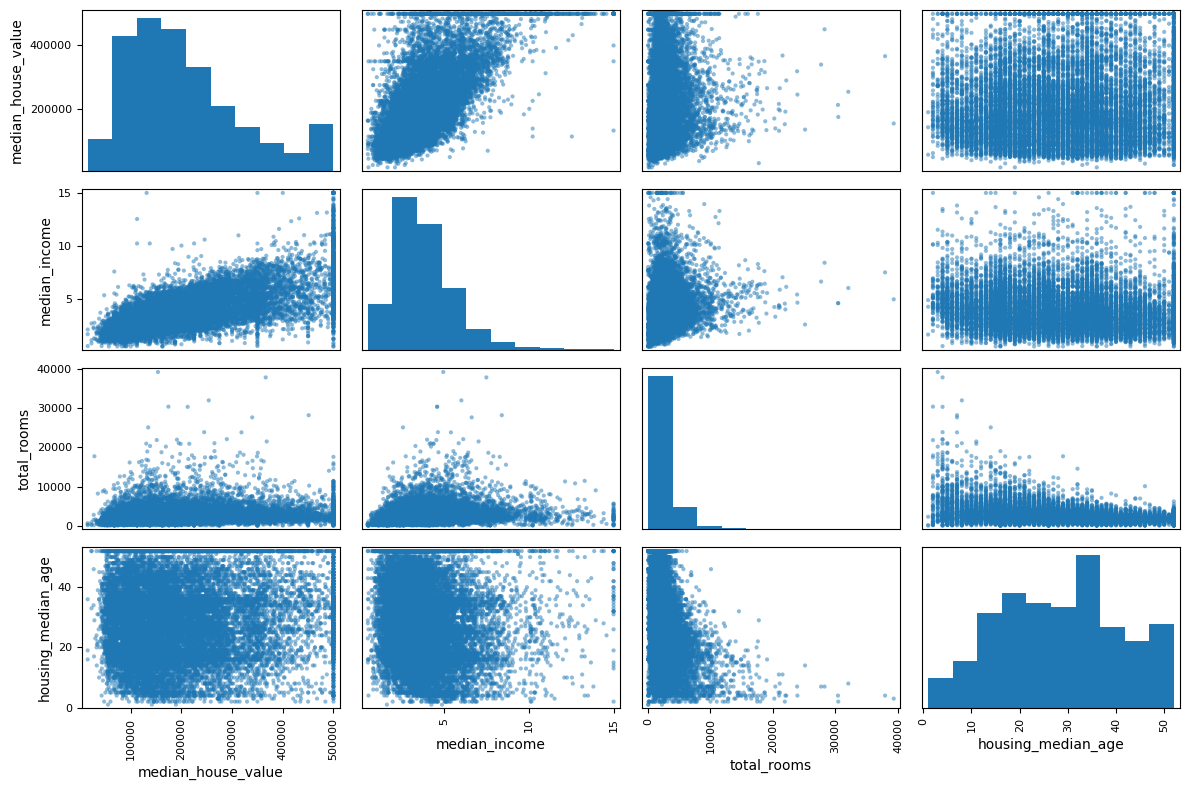

In [57]:
from pandas.plotting import scatter_matrix  # 여러 변수 간의 산점도 행렬을 그리기 위한 함수 불러오기
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]  # 시각화할 주요 속성 선택
scatter_matrix(housing[attributes], figsize=(12, 8))  # 선택한 변수들로 산점도 행렬 생성, 그래프 크기 지정
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


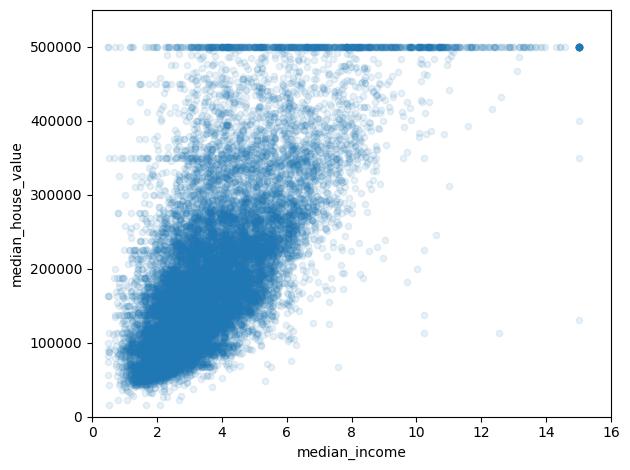

In [58]:
# 'median_income'과 'median_house_value'의 관계를 나타내는 산점도 생성
housing.plot(kind="scatter", x="median_income", y="median_house_value",  # x축에 'median_income', y축에 'median_house_value' 사용
             alpha=0.1)  # 점의 투명도를 10%로 설정하여 데이터 포인트들이 겹칠 때 더 잘 보이도록 함

# x축과 y축의 범위 설정: x축은 0부터 16까지, y축은 0부터 550,000까지 설정
plt.axis([0, 16, 0, 550000])

# 그래프를 'income_vs_house_value_scatterplot.png'라는 이름으로 저장
save_fig("income_vs_house_value_scatterplot")


## Experimenting with Attribute Combinations

In [12]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]  # 가구당 평균 방 개수 계산
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]  # 방 중 침실이 차지하는 비율 계산
housing["population_per_household"] = housing["population"] / housing["households"]  # 가구당 평균 인구 수 계산

In [13]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()  # 숫자형 열만 선택해 상관계수 행렬 계산
corr_matrix["median_house_value"].sort_values(ascending=False)  # 집값과의 상관계수를 높은 순서대로 정렬

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [60]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


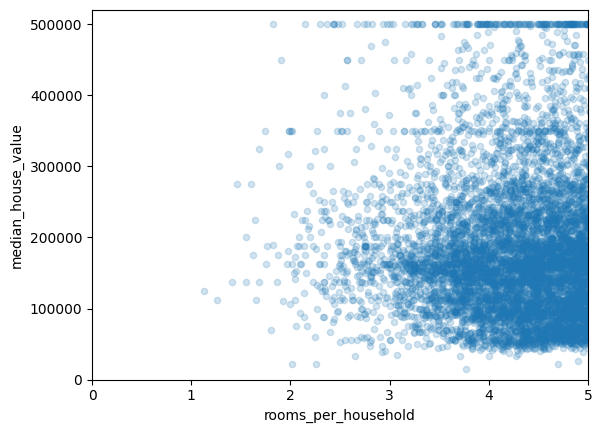

In [63]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households'] # 재정의

# 'rooms_per_household'와 'median_house_value'의 관계를 나타내는 산점도 생성
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",  # x축에 'rooms_per_household', y축에 'median_house_value' 사용
             alpha=0.2)  # 점의 투명도를 20%로 설정하여 데이터 포인트들이 겹칠 때 더 잘 보이도록 함

# x축과 y축의 범위 설정: x축은 0부터 5까지, y축은 0부터 520,000까지 설정
plt.axis([0, 5, 0, 520000])

plt.show()


In [64]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091
